In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [3]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Данные содержат информаю по 4 характеристикам ириса (длина и ширина чашелистика и длина и ширина лепестка), всего 150 записей. Пропусков в данных нет.
Все характеристики (переменные): имеют числовое значение (непрерывное числовое значение), тип float64.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


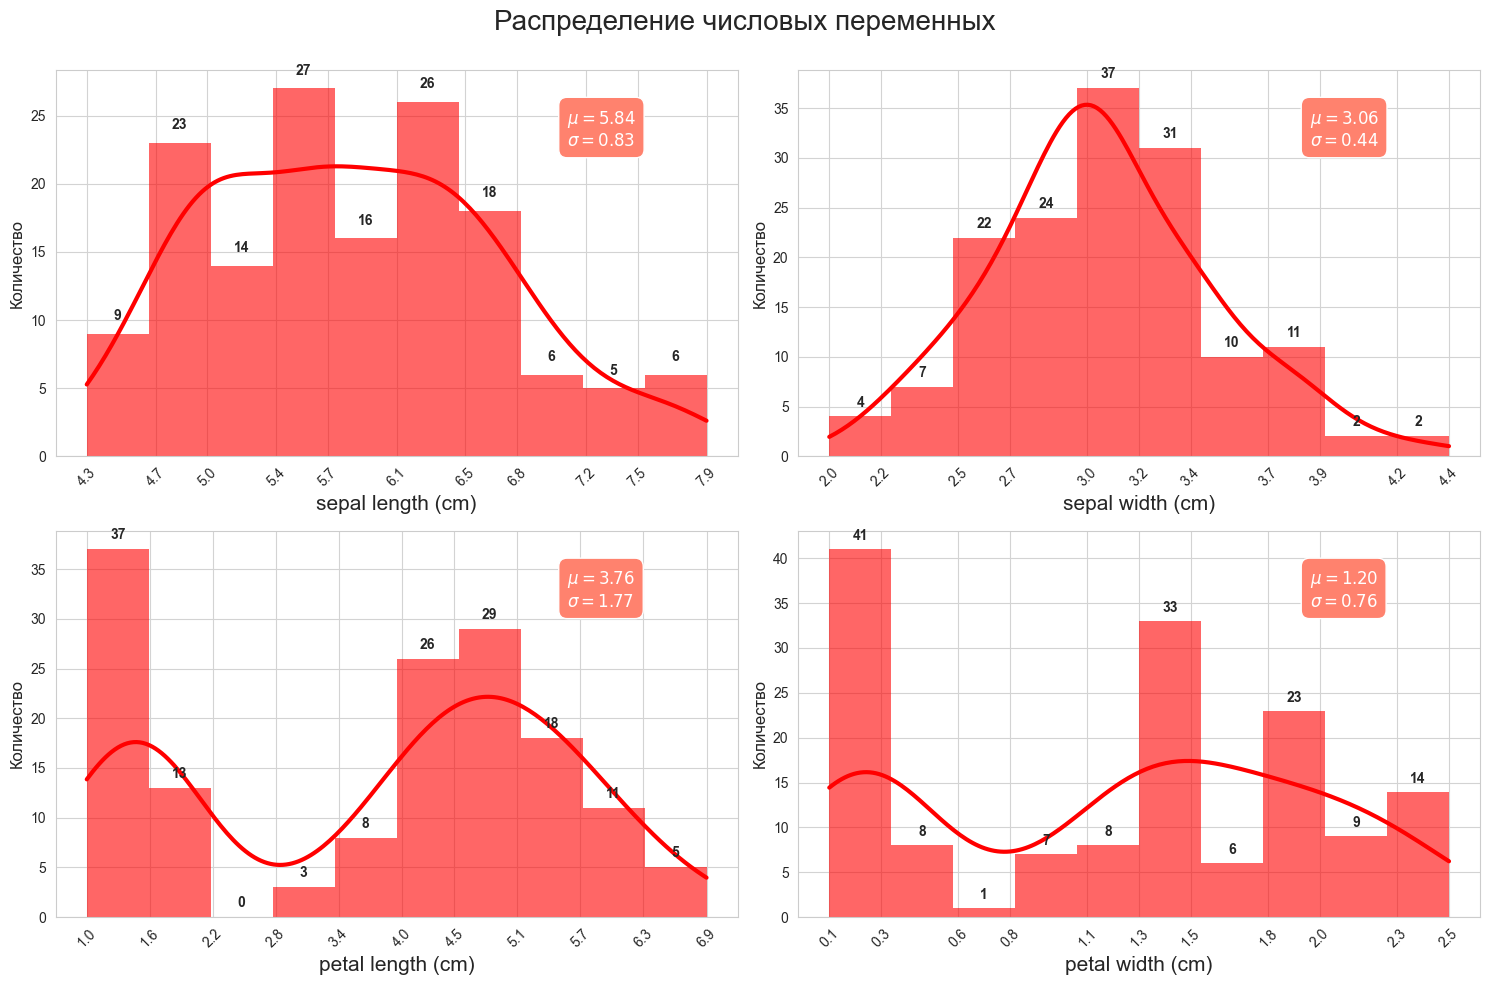

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df.columns):
    x = i // 2
    y = i % 2
    values, bin_edges = np.histogram(df[col],
                                     range=(df[col].min(), df[col].max()))

    graph = sns.histplot(data=df, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df[col].mean(),
        r'$\sigma=%.2f$' % df[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))


plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

По анализу описательной статистики и построенным гистограммам, выбросов в данных не видно.

In [7]:
target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

Данные содержат информацию по 3 типам Ириса, каждый тип представлен 50 записями. Данные распределены равномерно

Поделим выборку на тренировочную и тестовую и нормализуем данные

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.fit_transform(x_test)

Построим модель логистической регрессии с параметрами по умолчанию

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lg = LogisticRegression()
lg.fit(x_train_scale, y_train)
y_pred_train = lg.predict(x_train_scale)
y_pred_test = lg.predict(x_test_scale)
print('accuracy train', round(accuracy_score(y_train, y_pred_train), 3))
print('accuracy test', round(accuracy_score(y_test, y_pred_test), 3))

accuracy train 0.967
accuracy test 0.967


Точность, как на тренировочной, так и на тестовой выборке одинаковая и составляет 0.967.

Теперь добавим l1 и l2 регулиризацию, при этом попробуем разные значения alpha.

In [26]:

# Параметры регуляризации для тестирования
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# Тестируем Lasso регрессию
for alpha in alphas:
    lasso = LogisticRegression(penalty='l1', C=1/alpha, solver='liblinear', multi_class='ovr')
    lasso.fit(x_train_scale, y_train)
    y_pred = lasso.predict(x_test_scale)
    print(f'Lasso alpha {alpha}: accuracy: {round(accuracy_score(y_test, y_pred), 3)}')

# Тестируем Ridge регрессию
for alpha in alphas:
    ridge = LogisticRegression(penalty='l2', C=1/alpha, solver='liblinear', multi_class='ovr')
    ridge.fit(x_train_scale, y_train)
    y_pred = ridge.predict(x_test_scale)
    print(f'Ridge alpha {alpha}: accuracy: {round(accuracy_score(y_test, y_pred), 3)}')

Lasso alpha 0.01: accuracy: 0.967
Lasso alpha 0.1: accuracy: 0.967
Lasso alpha 1.0: accuracy: 1.0
Lasso alpha 10.0: accuracy: 0.933
Lasso alpha 100.0: accuracy: 0.333
Ridge alpha 0.01: accuracy: 0.967
Ridge alpha 0.1: accuracy: 1.0
Ridge alpha 1.0: accuracy: 0.933
Ridge alpha 10.0: accuracy: 0.933
Ridge alpha 100.0: accuracy: 0.9


В случае добавления l1 регулиризации удалось увеличить точность используя параметр alpha = 1. При снижении  и при повышении параметра alpha точность модели на тестовой выборке падает.

В случае добавления l2 регулиризации точность модели увеличивается при небольшом снижении параметра alpha, но при дальнейшем снижении, точность начинает снижаться. При увеличении параметра alpha точность модели на тестовой выборке падает.

In [29]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lg, df, target, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.02


Кросс-валидация 5 фолдов показала среднюю точность 0.97 со стандартным отклонением 0.02.

Построим 3 кривые обучения:
- модель без регулиризации;
- модель с L1 регулиризацией;
- модель с L2 регулиризацией.

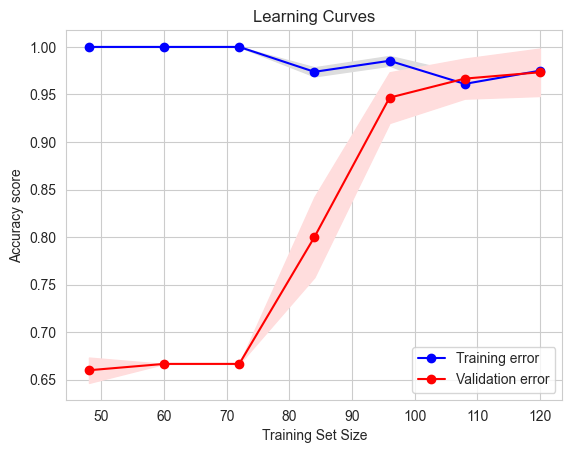

In [18]:
from sklearn.model_selection import learning_curve
# Создание модели линейной регрессии`   
model = LogisticRegression()

# Получение кривых обучения
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=df,
    y=target,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
)


# Средние значения и стандартное отклонение ошибок обучения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Средние значения и стандартное отклонение ошибок валидации
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Построение графиков
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='#FFDDDD')
plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training error')
plt.plot(train_sizes, validation_mean, 'o-', color='r', label='Validation error')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

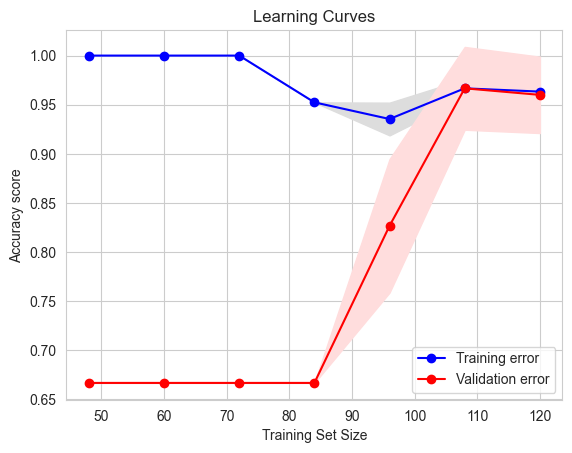

In [20]:
from sklearn.model_selection import learning_curve
# Создание модели линейной регрессии
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')

# Получение кривых обучения
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model_l1,
    X=df,
    y=target,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
)


# Средние значения и стандартное отклонение ошибок обучения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Средние значения и стандартное отклонение ошибок валидации
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Построение графиков
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='#FFDDDD')
plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training error')
plt.plot(train_sizes, validation_mean, 'o-', color='r', label='Validation error')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

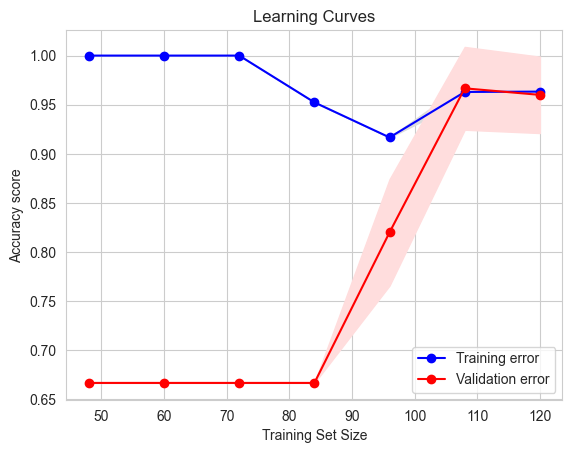

In [22]:
from sklearn.model_selection import learning_curve
# Создание модели линейной регрессии
model_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# Получение кривых обучения
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model_l2,
    X=df,
    y=target,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
)


# Средние значения и стандартное отклонение ошибок обучения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Средние значения и стандартное отклонение ошибок валидации
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Построение графиков
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='#FFDDDD')
plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training error')
plt.plot(train_sizes, validation_mean, 'o-', color='r', label='Validation error')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

Анализ кривых обучения показал следующие результаты по обобщающей способности моделей.

Модель без регулиризации:
- при обучении модели без регулиризации видно, что при маленьких тренировочных выборках 50-75 точность обучающей выборки максимальная 100%, однако точность модели на валидационной выборке очень низкая, и при увеличении от 50 до 75 - точность не растет. Это говорит об очень низкой обобщающей способности модели, модель переобучается на тренировочной выборке;
- при увеличении тренировочной выборки от 75 до 95 происходит снижение до 98% точности модели на тренировочнйо выборке, при этом происходит резкий рост точности от 66% до 95% на тестовой выборке, таким образом, мы видим, что обощаяющая способность модели растет;
- дальнейший рост размера выборки (более 95) снижает еще больше точность на тренировочной выборке, и замедляет рост точности на тестовой выборке, однако точность на тестовой выборке растет и достигает значений точности на тренировочной выборке, здесь мы видим, что значения точности на тренировочнйо и тестовых выборках сопадают, таким образом обощающая способность максимальна.

Модель с регулиризацией l1 и l2 показывает похожие результаты:
- при обучении модели без регулиризации видно, что при маленьких тренировочных выборках 50-72 точность обучающей выборки максимальная 100%, однако точность модели на валидационной выборке очень низкая, при этом при увелчении выборки от 50 до 72, точность на тестовой выборки не растет. Это говорит об очень низкой обобщающей способности модели, модель переобучается на тренировочной выборке. при дальнейшей увеличении выборки до 85, точность на обучающей выборки начинает падать, но точность на тестовой все-равно остается такой же низкой 66%, то есть обощающая способность модели остается очень низкой.
- при увеличении тренировочной выборки от 85 до 110 происходит снижение до 95% точности модели на тренировочной выборке, при этом происходит резкий рост точности от 66% до 95% на тестовой выборке, таким образом, мы видим, что обобщаяющая способность модели растет;
- дальнейший рост размера выборки (более 110) точность , как нак тренировочной, так и на тестовой выборке почт не меняется.